importing necessary libraries

In [284]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
df = pd.read_csv("C:/Users/ellal/Desktop/coding stuff/train.csv", index_col=0)
test_df = pd.read_csv("C:/Users/ellal/Desktop/coding stuff/test.csv", index_col=0)

Preprocessing Data

In [285]:
new_df = df.copy()
new_df.drop(['Ticket','Cabin'], axis =1, inplace=True)
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [286]:
def extract_title(name):
    '''extract title from each name'''
    name_parts = name.split(",")
    return name_parts[1].split()[0][:-1]

new_df['Title'] = new_df['Name'].apply(extract_title)

In [287]:
new_df.drop(['Name'], axis= 1, inplace=True)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [288]:
new_df[new_df.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
48,1,3,female,NaN,0,0,7.7500,Q,Miss
77,0,3,male,NaN,0,0,7.8958,S,Mr
78,0,3,male,NaN,0,0,8.0500,S,Mr
88,0,3,male,NaN,0,0,8.0500,S,Mr
96,0,3,male,NaN,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
864,0,3,female,NaN,8,2,69.5500,S,Miss
871,0,3,male,26.0,0,0,7.8958,S,Mr
878,0,3,male,19.0,0,0,7.8958,S,Mr


In [289]:
new_df.drop_duplicates(inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  787 non-null    int64  
 1   Pclass    787 non-null    int64  
 2   Sex       787 non-null    object 
 3   Age       680 non-null    float64
 4   SibSp     787 non-null    int64  
 5   Parch     787 non-null    int64  
 6   Fare      787 non-null    float64
 7   Embarked  785 non-null    object 
 8   Title     787 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 61.5+ KB


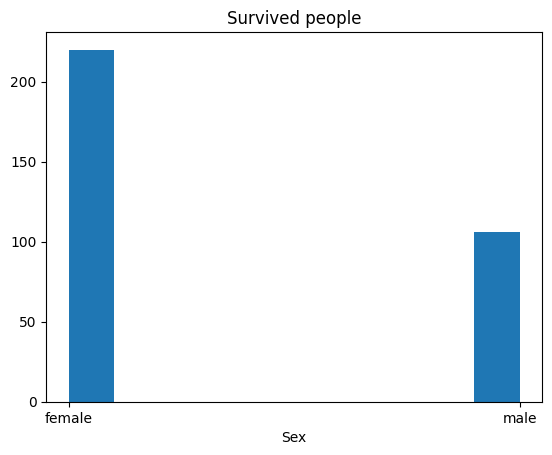

In [290]:
plt.title('Survived people')
plt.hist(new_df[new_df['Survived'] == 1]['Sex'], bins=10)
plt.xlabel('Sex')
plt.show()

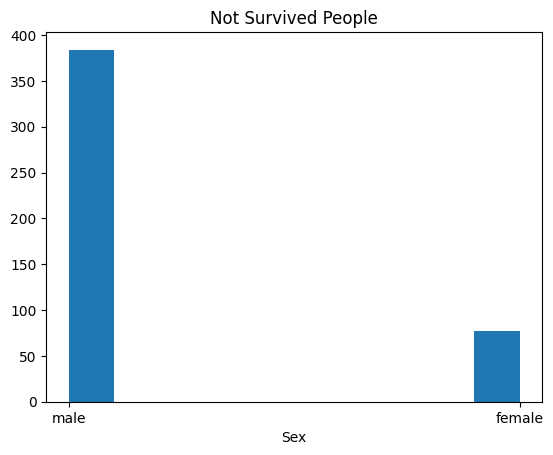

In [291]:
plt.title('Not Survived People')
plt.hist(new_df[new_df['Survived'] == 0]['Sex'], bins = 10)
plt.xlabel('Sex')
plt.show()

In [292]:
(new_df[new_df['Age'].isnull()][new_df['Survived']==0])

C:\Users\ellal\AppData\Local\Temp\ipykernel_25736\3178219792.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (new_df[new_df['Age'].isnull()][new_df['Survived']==0])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q,Mr
27,0,3,male,NaN,0,0,7.2250,C,Mr
30,0,3,male,NaN,0,0,7.8958,S,Mr
43,0,3,male,NaN,0,0,7.8958,C,Mr
46,0,3,male,NaN,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
794,0,1,male,NaN,0,0,30.6958,C,Mr
826,0,3,male,NaN,0,0,6.9500,Q,Mr
827,0,3,male,NaN,0,0,56.4958,S,Mr


In [293]:
titles_to_replace = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','th']
new_df['Title'] = new_df['Title'].replace(titles_to_replace, 'Rare', regex=True)

new_df['Title'] = new_df['Title'].replace('Mlle', 'Miss')
new_df['Title'] = new_df['Title'].replace('Ms', 'Miss')
new_df['Title'] = new_df['Title'].replace('Mme', 'Mrs')
    
new_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.564103
1,Miss,0.700000
2,Mr,0.183295
3,Mrs,0.790323
4,Rare,0.347826


In [294]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
new_df['Title'] = new_df['Title'].map(title_mapping)
new_df['Title'] = new_df['Title'].fillna(0)

new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,3
3,1,3,female,26.0,0,0,7.9250,S,2
4,1,1,female,35.0,1,0,53.1000,S,3
5,0,3,male,35.0,0,0,8.0500,S,1


In [295]:
new_df['Sex'] = new_df['Sex'].map({'female': 1, 'male':0}).astype(int)

In [296]:
new_df.Embarked.dropna(axis = 0, inplace=True)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,1
2,1,1,1,38.0,1,0,71.2833,C,3
3,1,3,1,26.0,0,0,7.9250,S,2
4,1,1,1,35.0,1,0,53.1000,S,3
5,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,S,5
888,1,1,1,19.0,0,0,30.0000,S,2
889,0,3,1,NaN,1,2,23.4500,S,2


In [297]:
#onehot encodding
encoded_data = pd.get_dummies(new_df['Embarked'])

# Concatenate the encoded data with the original dataframe
new_df = pd.concat([new_df, encoded_data], axis=1)

# Drop the original categorical column (optional)
new_df.drop('Embarked', axis=1, inplace=True)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,False,False,True
2,1,1,1,38.0,1,0,71.2833,3,True,False,False
3,1,3,1,26.0,0,0,7.9250,2,False,False,True
4,1,1,1,35.0,1,0,53.1000,3,False,False,True
5,0,3,0,35.0,0,0,8.0500,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,5,False,False,True
888,1,1,1,19.0,0,0,30.0000,2,False,False,True
889,0,3,1,NaN,1,2,23.4500,2,False,False,True


In [298]:
Age_med = new_df['Age'].median()
new_df['Age']= new_df['Age'].fillna(Age_med)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [299]:
new_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,0.414231,2.246506,0.377382,29.560889,0.532402,0.416773,34.775227,1.796696
std,0.492902,0.853207,0.485040,13.665579,1.020106,0.837495,52.090212,1.061392
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,15.900000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [300]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [301]:
test_df.drop(['Ticket','Cabin'], axis =1, inplace=True)
test_df['Title'] = test_df['Name'].apply(extract_title)
test_df.drop(['Name'], axis= 1, inplace=True)

test_df['Title'] = test_df['Title'].replace(titles_to_replace, 'Rare', regex=True)

test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test_df['Title'] = test_df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].fillna(0)

test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male':0}).astype(int)

test_df.Embarked.dropna(axis = 0, inplace=True)

encoded_data = pd.get_dummies(test_df['Embarked'])
test_df = pd.concat([test_df, encoded_data], axis=1)
test_df.drop('Embarked', axis=1, inplace=True)

test_df['Age']= test_df['Age'].fillna(Age_med)

test_df.Fare.fillna(new_df.Fare.median(), inplace=True)

C:\Users\ellal\AppData\Local\Temp\ipykernel_25736\2185250544.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.Fare.fillna(new_df.Fare.median(), inplace=True)


In [309]:
'''X_train = new_df.drop("Survived", axis=1)
Y_train = new_df["Survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape'''

((787, 10), (787,), (418, 10))